In [1]:
#Import dependencies
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
#Open filtered CSV file
traffic_injuries = Path("../Resources/road-traffic-injuries-2002-2010.csv")

df = pd.read_csv(traffic_injuries)

# Read in the data. 
df

/var/folders/gj/34pvzc9x2x98g0vpglqmrsz80000gn/T/ipykernel_37457/2576391898.py:4: DtypeWarning: Columns (0,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(traffic_injuries)


,ind_id,ind_definition,reportyear,geotype,geotypevalue,geoname,county_name,county_fips,region_name,region_code,...,avmttotal,avmtrate,LL95CI_avmtrate,UL95CI_avmtrate,avmtrate_se,avmtrate_rse,CA_decile_avmt,CA_RR_avmtrate,groupquarters,version
0,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
1,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
2,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
3,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
4,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448945,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12/17/13 13:55
448946,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12/17/13 13:55
448947,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12/17/13 13:55
448948,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,35237538.0,28.38,0.0,84.0,28.38,100.0,NaN,1.17,43.0,12/17/13 13:55


In [3]:
#clean data to remove null values and columns 
clean_df = df.drop(columns = ["ind_definition"])
clean_df = clean_df.drop(clean_df[clean_df['ind_id'] == "END OF TABLE"].index)
clean_df = clean_df.drop(columns = ["ind_id", 'LL95CI_avmtrate', 'UL95CI_avmtrate',
       'avmtrate_se', 'avmtrate_rse', 'CA_decile_avmt', 'CA_RR_avmtrate',
       'groupquarters','LL95CI_poprate', 'UL95CI_poprate',
       'poprate_se', 'poprate_rse', 'CA_decile_pop', 'CA_RR_poprate',
       'avmttotal', 'avmtrate'])
clean_df = clean_df[clean_df['severity'] != 'ND']
clean_df = clean_df[clean_df['mode'] != 'All modes']
clean_df = clean_df[~clean_df['reportyear'].isin(['2002-2004','2005-2007','2008-2010','2006-2010'])]

clean_df

,reportyear,geotype,geotypevalue,geoname,county_name,county_fips,region_name,region_code,mode,severity,injuries,totalpop,poprate,version
2,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Bicyclist,Killed,7.0,2914663.0,0.24,12/17/13 13:55
3,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Bicyclist,Severe Injury,49.0,2914663.0,1.68,12/17/13 13:55
4,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Bus,Severe Injury,1.0,2914663.0,0.03,12/17/13 13:55
5,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Car/Pickup,Killed,130.0,2914663.0,4.46,12/17/13 13:55
6,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Car/Pickup,Severe Injury,488.0,2914663.0,16.74,12/17/13 13:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448943,2010,PL,56518.0,Penn Valley CDP,Nevada,6057.0,Northeast Sierra,6.0,Motorcycle,Severe Injury,1.0,NaN,NaN,12/17/13 13:55
448944,2010,PL,56518.0,Penn Valley CDP,Nevada,6057.0,Northeast Sierra,6.0,Vehicles,Severe Injury,1.0,NaN,NaN,12/17/13 13:55
448946,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,Car/Pickup,Severe Injury,1.0,16180.0,6.18,12/17/13 13:55
448947,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,Pedestrian,Severe Injury,1.0,16180.0,6.18,12/17/13 13:55


In [4]:
clean_df.isnull().sum()

reportyear           0
geotype              0
geotypevalue         0
geoname              0
county_name       2032
county_fips       2032
region_name     129603
region_code     129603
mode                 0
severity             0
injuries             0
totalpop        142303
poprate         142381
version              0
dtype: int64

In [5]:
mode_float = pd.get_dummies(clean_df["mode"], dtype=float)
mode_float

,Bicyclist,Bus,Car/Pickup,Motorcycle,Pedestrian,Truck,Vehicles
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
448943,0.0,0.0,0.0,1.0,0.0,0.0,0.0
448944,0.0,0.0,0.0,0.0,0.0,0.0,1.0
448946,0.0,0.0,1.0,0.0,0.0,0.0,0.0
448947,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
#make float for type of severity of accident. Killed or injured
severity_float = pd.get_dummies(clean_df["severity"], dtype=float)
#make float list to concatenate since you cannot merge
floats = [mode_float, severity_float]
severity_float

,Killed,Severe Injury
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
5,1.0,0.0
6,0.0,1.0
...,...,...
448943,0.0,1.0
448944,0.0,1.0
448946,0.0,1.0
448947,0.0,1.0


In [7]:
#concatentate outer to get new df with 1.0 value denoting mode and injury
merged_mode_injury =  pd.concat(floats, axis=1, join="outer")
merged_mode_injury.head()

,Bicyclist,Bus,Car/Pickup,Motorcycle,Pedestrian,Truck,Vehicles,Killed,Severe Injury
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
#Create new dataframe, this is better than clean to be referenced when making graphs of data
new_df = pd.DataFrame(
    {"reportyear" : clean_df["reportyear"],
    "county_name" : clean_df["county_name"],
    "region_name" : clean_df["region_name"],
    "region_code" : clean_df["region_code"],
    "Bicyclist" : merged_mode_injury["Bicyclist"],
    "Bus": merged_mode_injury["Bus"],
    "Car/Pickup" : merged_mode_injury["Car/Pickup"],
    "Motorcycle" : merged_mode_injury["Motorcycle"],
    "Pedestrian" : merged_mode_injury["Pedestrian"],
    "Truck" : merged_mode_injury["Truck"],
    "Vehicles" : merged_mode_injury["Vehicles"],
    "Killed" : merged_mode_injury["Killed"],
    "Severe Injury" : merged_mode_injury["Severe Injury"],
    "injuries" : clean_df["injuries"],
    "totalpop" : clean_df["totalpop"],
    "poprate" : clean_df["poprate"]
 }
 )

new_df

,reportyear,county_name,region_name,region_code,Bicyclist,Bus,Car/Pickup,Motorcycle,Pedestrian,Truck,Vehicles,Killed,Severe Injury,injuries,totalpop,poprate
2,2002,Orange,Southern California,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,2914663.0,0.24
3,2002,Orange,Southern California,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,2914663.0,1.68
4,2002,Orange,Southern California,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2914663.0,0.03
5,2002,Orange,Southern California,14.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,130.0,2914663.0,4.46
6,2002,Orange,Southern California,14.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,488.0,2914663.0,16.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448943,2010,Nevada,Northeast Sierra,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN
448944,2010,Nevada,Northeast Sierra,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN
448946,2010,Nevada,Northeast Sierra,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,16180.0,6.18
448947,2010,Nevada,Northeast Sierra,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,16180.0,6.18


In [9]:
#calculating severity based on poprate

year_pop_severity = clean_df.groupby(['reportyear', 'severity'])['poprate'].sum().reset_index()
year_pop_severity = year_pop_severity[year_pop_severity["severity"] != "ND"]
yearwise_killed = year_pop_severity[year_pop_severity["severity"] == "Killed"]
yearwise_injured = year_pop_severity[year_pop_severity["severity"] == "Severe Injury"]
yps_total = pd.merge(yearwise_killed, yearwise_injured, how = "outer", on = ["reportyear"])
yps_total

,reportyear,severity_x,poprate_x,severity_y,poprate_y
0,2002,Killed,13395.07,Severe Injury,49415.22
1,2003,Killed,14793.82,Severe Injury,47112.90
2,2004,Killed,18803.16,Severe Injury,62506.76
3,2005,Killed,21036.95,Severe Injury,49869.85
4,2006,Killed,15022.71,Severe Injury,56694.94
5,2007,Killed,13540.93,Severe Injury,50288.81
6,2008,Killed,12873.08,Severe Injury,42286.48
7,2009,Killed,14819.58,Severe Injury,42719.06
8,2010,Killed,20619.80,Severe Injury,48604.76


In [10]:
#instead of injuries maybe we use poprate
aggregation = clean_df.groupby(["region_name"])["poprate"].agg(['mean','median', 'var', 'std', 'sem','quantile'])
aggregation
#READ COMMENT we will come back to this

,mean,median,var,std,sem,quantile
region_name,,,,,,
Bay Area,9.147780,4.930,156.888649,12.525520,0.165542,4.930
Butte,13.901534,6.910,282.643344,16.812000,0.864716,6.910
Central/Southeast Sierra,60.756222,26.250,12282.137195,110.824804,4.049450,26.250
Monterey Bay,16.747364,6.750,2278.194300,47.730434,1.543713,6.750
North Coast,22.853787,13.620,910.360973,30.172189,1.081031,13.620
Northeast Sierra,34.855418,20.650,1977.026450,44.463766,1.674602,20.650
Northern Sacramento Valley,31.006240,16.640,1758.307990,41.932183,1.890449,16.640
Sacramento Area,11.317446,5.300,292.586068,17.105147,0.413043,5.300
San Diego,8.492609,4.410,95.934075,9.794594,0.260105,4.410


In [117]:
# Accidents by year
# yearly_accidents = clean_df.groupby('reportyear').size().reset_index(name='count')
# yearly_accidents = yearly_accidents.sort_values('reportyear') 
# yearly_accidents
#need change of count

,reportyear,count
0,2002,19755
1,2003,19728
2,2004,19957
3,2005,19903
4,2006,20029
5,2007,19729
6,2008,18556
7,2009,17363
8,2010,16639


In [11]:
# Injuries by year
yearly_injuries = clean_df.groupby('reportyear')['injuries'].sum().reset_index()
yearly_injuries

,reportyear,injuries
0,2002,165132.0
1,2003,160846.0
2,2004,163524.0
3,2005,161152.0
4,2006,159340.0
5,2007,157504.0
6,2008,140200.0
7,2009,126938.0
8,2010,118716.0


In [12]:
# Group by year and severity
yearwise_severity = clean_df.groupby(['reportyear', 'severity'])['injuries'].sum().reset_index()
yearwise_severity

,reportyear,severity,injuries
0,2002,Killed,38830.0
1,2002,Severe Injury,126302.0
2,2003,Killed,39286.0
3,2003,Severe Injury,121560.0
4,2004,Killed,37752.0
5,2004,Severe Injury,125772.0
6,2005,Killed,39572.0
7,2005,Severe Injury,121580.0
8,2006,Killed,38450.0
9,2006,Severe Injury,120890.0


In [13]:
# Group by year and mode
yearwise_mode = clean_df.groupby(['reportyear', 'mode'])['injuries'].sum().reset_index()
#yearwise_mode
mode_by_year= yearwise_mode.pivot_table(index='reportyear', columns='mode', values='injuries')
mode_by_year

mode,Bicyclist,Bus,Car/Pickup,Motorcycle,Pedestrian,Truck,Vehicles
reportyear,,,,,,,
2002,3810.0,155.0,64215.0,9405.0,11472.0,1150.0,74925.0
2003,4458.0,245.0,60205.0,10110.0,13278.0,995.0,71555.0
2004,5304.0,150.0,60310.0,10290.0,14490.0,1115.0,71865.0
2005,5262.0,210.0,58610.0,10540.0,15030.0,1070.0,70430.0
2006,5706.0,220.0,56795.0,11580.0,14574.0,935.0,69530.0
2007,5172.0,180.0,54590.0,12820.0,15072.0,1040.0,68630.0
2008,5868.0,375.0,45430.0,13395.0,13992.0,970.0,60170.0
2009,5970.0,345.0,40905.0,11540.0,13728.0,830.0,53620.0
2010,5904.0,155.0,37700.0,11090.0,13452.0,735.0,49680.0


In [15]:
# Accidents by year and severity
yearwise_severity = clean_df.groupby(['reportyear', 'severity']).size().reset_index(name='Accident Count')
yearwise_severity

,reportyear,severity,Accident Count
0,2002,Killed,5953
1,2002,Severe Injury,13802
2,2003,Killed,6101
3,2003,Severe Injury,13627
4,2004,Killed,5985
5,2004,Severe Injury,13972
6,2005,Killed,6117
7,2005,Severe Injury,13786
8,2006,Killed,6193
9,2006,Severe Injury,13836


In [16]:
# Accidents by Region and severity
region_severity = clean_df.groupby(['region_name', 'severity']).size().reset_index(name='Accident Count')
region_severity

,region_name,severity,Accident Count
0,Bay Area,Killed,2361
1,Bay Area,Severe Injury,4628
2,Butte,Killed,252
3,Butte,Severe Injury,449
4,Central/Southeast Sierra,Killed,472
5,Central/Southeast Sierra,Severe Injury,1068
6,Monterey Bay,Killed,480
7,Monterey Bay,Severe Injury,1123
8,North Coast,Killed,481
9,North Coast,Severe Injury,999


In [17]:
# Accidents by Mode and severity
mode_severity = clean_df.groupby(['mode', 'severity']).size().reset_index(name='Accident Count')
mode_severity 

,mode,severity,Accident Count
0,Bicyclist,Killed,2024
1,Bicyclist,Severe Injury,8636
2,Bus,Killed,155
3,Bus,Severe Injury,453
4,Car/Pickup,Killed,16809
5,Car/Pickup,Severe Injury,36929
6,Motorcycle,Killed,4790
7,Motorcycle,Severe Injury,15077
8,Pedestrian,Killed,7515
9,Pedestrian,Severe Injury,15226


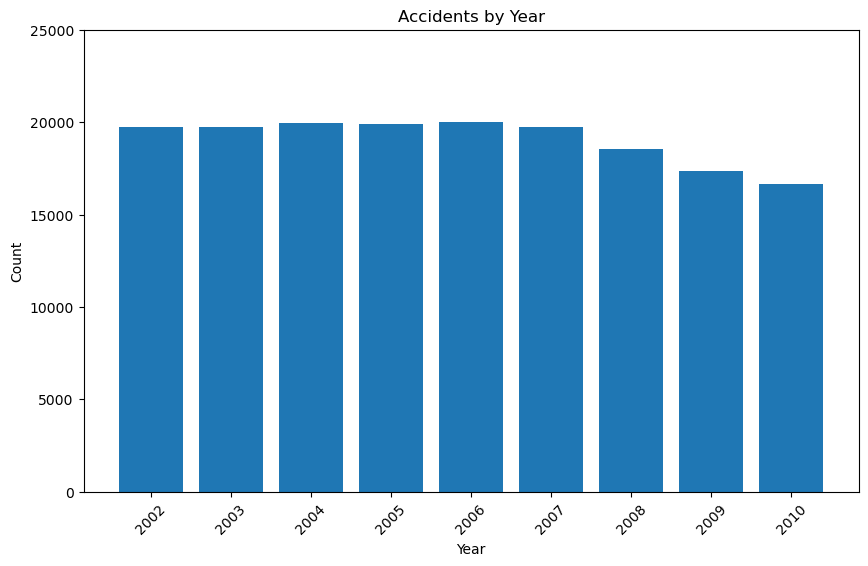

In [18]:
# Create a Bar chart- Accidents by year
yearly_accidents = clean_df.groupby('reportyear').size().reset_index(name='count')
yearly_accidents = yearly_accidents.sort_values('reportyear') 
plt.figure(figsize=(10, 6))
plt.bar(yearly_accidents['reportyear'], yearly_accidents['count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.ylim(0, 25000)
plt.title('Accidents by Year')
plt.xticks(rotation=45)
plt.show()
#Add Charts to DATA folder

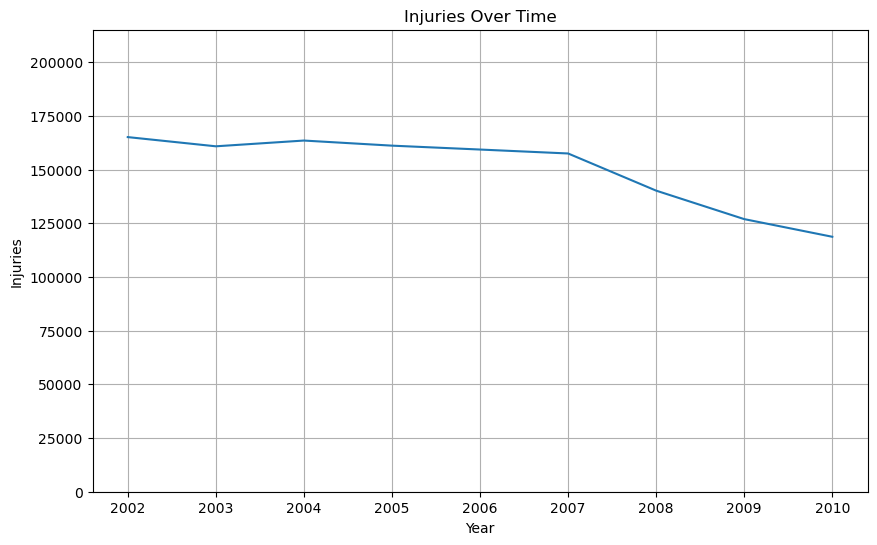

In [19]:
# Create a Line chart Injuries by year
yearly_injuries = clean_df.groupby('reportyear')['injuries'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_injuries['reportyear'], yearly_injuries['injuries'])
plt.xlabel('Year')
plt.ylabel('Injuries')
plt.ylim(0, max(yearly_injuries['injuries']) + 50000)
plt.title('Injuries Over Time')
plt.grid(True) 
plt.show()

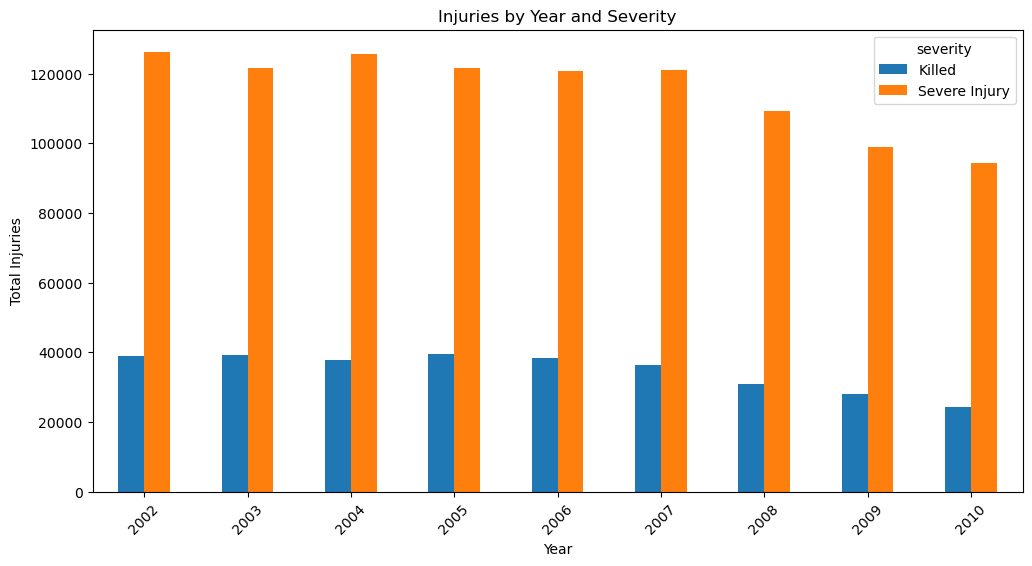

In [20]:
# Create a Bar chart- Group by year and severity
yearwise_severity = clean_df.groupby(['reportyear', 'severity'])['injuries'].sum().reset_index()

yearwise_severity = yearwise_severity.pivot_table(index='reportyear', columns='severity', values='injuries')
yearwise_severity.plot.bar(figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.title('Injuries by Year and Severity')
plt.xticks(rotation=45)
plt.show()
#save in data folder

In [23]:
# Drop columns severity_x and severity_y
yps_total.drop(columns=["severity_x", "severity_y"], inplace=True)

# Rename columns poprate_x and poprate_y
yps_total.rename(columns={"poprate_x": "Killed Population Ratio", "poprate_y": "Severe Injury Population Ratio"}, inplace=True)
yps_total.set_index('reportyear', inplace=True)
yps_total


,Killed Population Ratio,Severe Injury Population Ratio
reportyear,,
2002,13395.07,49415.22
2003,14793.82,47112.90
2004,18803.16,62506.76
2005,21036.95,49869.85
2006,15022.71,56694.94
2007,13540.93,50288.81
2008,12873.08,42286.48
2009,14819.58,42719.06
2010,20619.80,48604.76


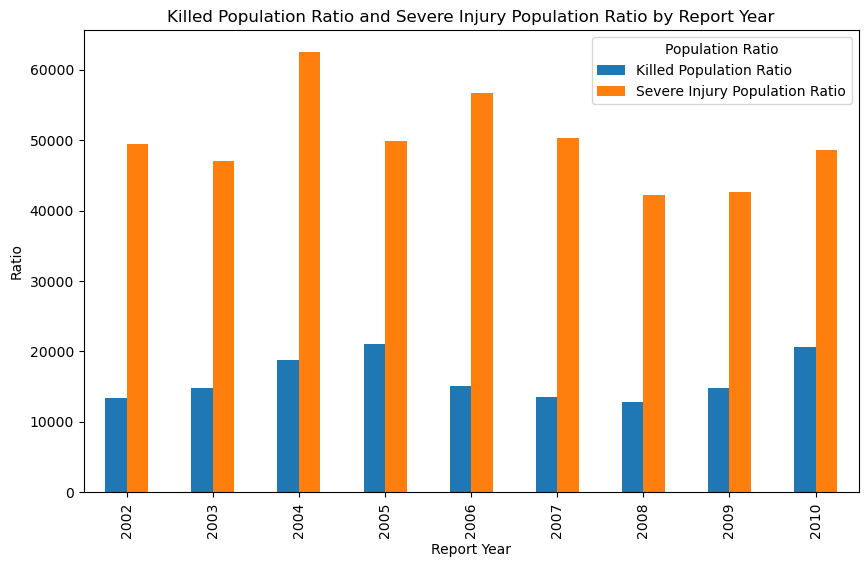

In [24]:
yps_total.plot(kind='bar', figsize=(10, 6))
plt.title('Killed Population Ratio and Severe Injury Population Ratio by Report Year')
plt.xlabel('Report Year')
plt.ylabel('Ratio')
plt.legend(title='Population Ratio')
plt.xticks(range(len(yps_total.index)), yps_total.index)
plt.show()

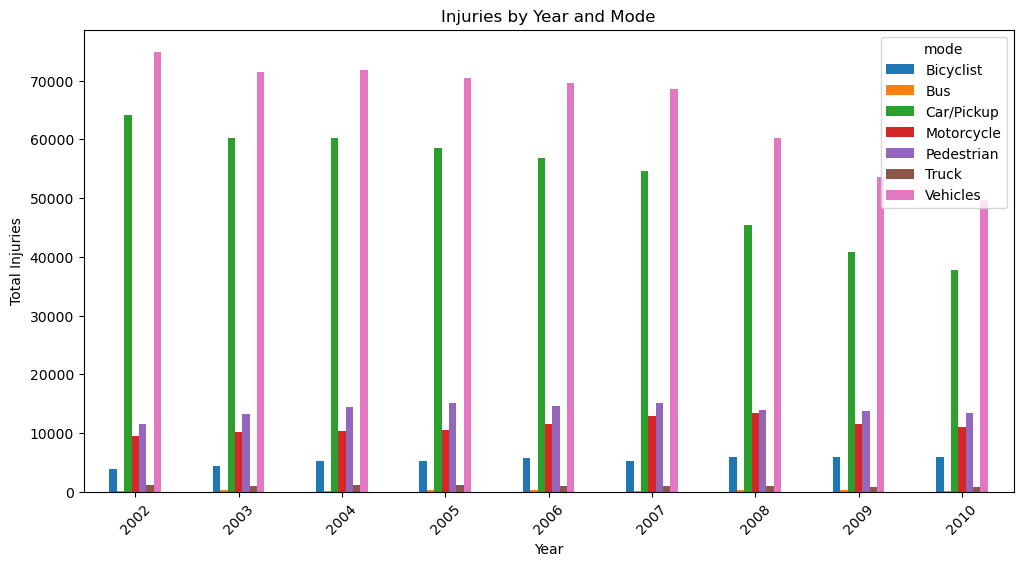

In [127]:
# Create a Bar chart- Group by year and mode
yearwise_mode = clean_df.groupby(['reportyear', 'mode'])['injuries'].sum().reset_index()
mode_by_year = yearwise_mode.pivot_table(index='reportyear', columns='mode', values='injuries')
mode_by_year.plot.bar(figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.title('Injuries by Year and Mode')
plt.xticks(rotation=45)
plt.show()
#save in data folder

Text(0.5, 1.0, 'Accidents by Transportation')

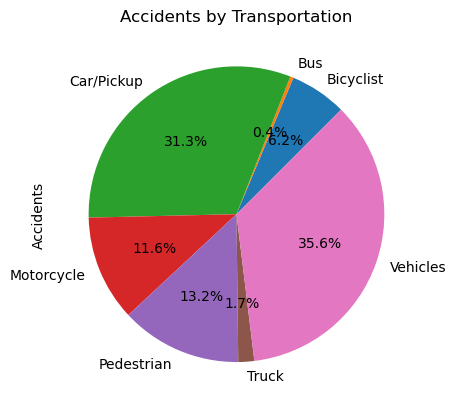

In [43]:
# Accidents by mode
collisions_by_mode = clean_df.groupby('mode').size().reset_index(name='Accidents')
collisions_by_mode

# Plot a pie chart using the DataFrame
collisions_by_mode.set_index('mode')['Accidents'].plot.pie(autopct='%1.1f%%', startangle=45)
plt.title('Accidents by Transportation')

In [ ]:
# Accidents by mode
collisions_by_mode = clean_df.groupby('mode').size().reset_index(name='Accidents')
collisions_by_mode

# Plot a pie chart using the DataFrame
collisions_by_mode.set_index('mode')['Accidents'].plot.pie(autopct='%1.1f%%', startangle=45)
plt.title('Accidents by Transportation')

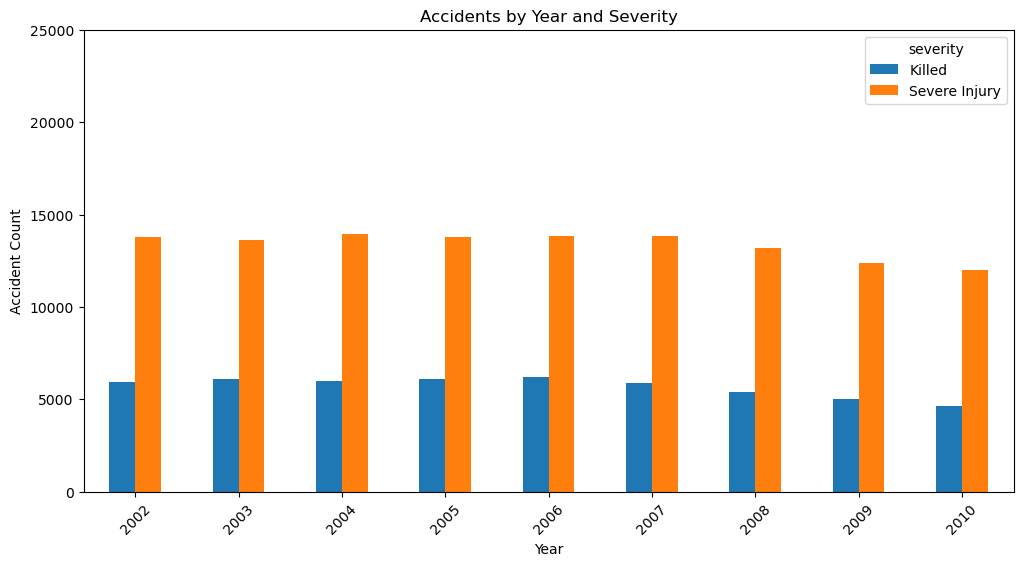

In [128]:
#Create a Bar chart- Accidents by year and severity
yearwise_severity = clean_df.groupby(['reportyear', 'severity']).size().reset_index(name='Accident Count')

pivot_data = yearwise_severity.pivot_table(index='reportyear', columns='severity', values='Accident Count').sort_index(axis=1)

pivot_data.plot.bar(figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.ylim(0, 25000)
plt.title('Accidents by Year and Severity')
plt.xticks(rotation=45)
plt.show()

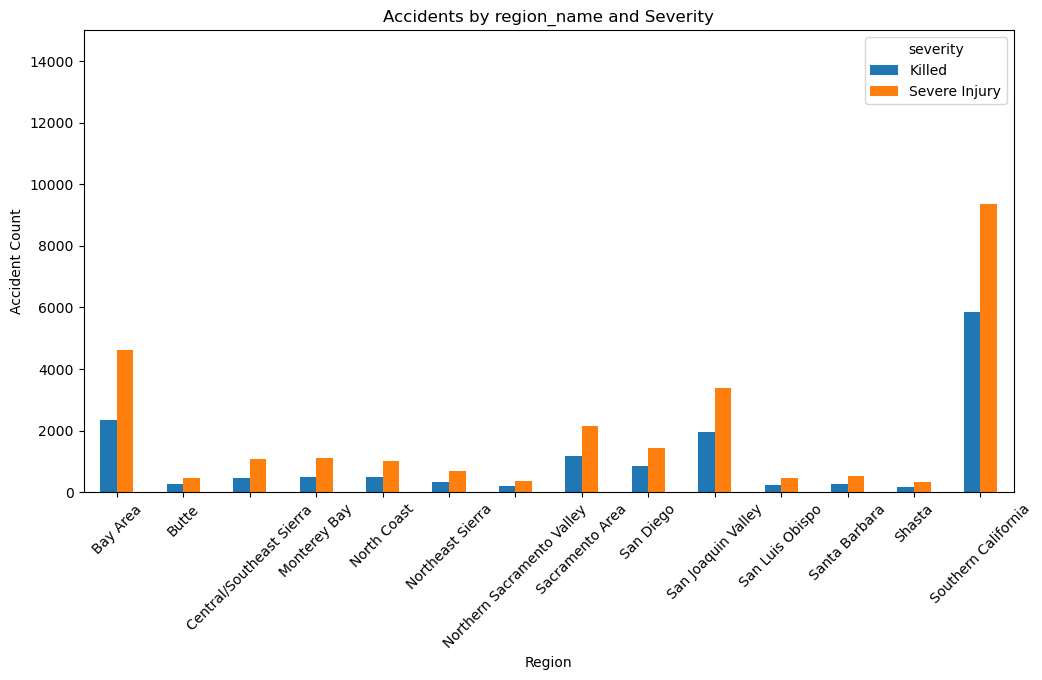

In [129]:
# Create a Bar chart- Accidents by Region and severity
region_severity = clean_df.groupby(['region_name', 'severity']).size().reset_index(name='Accident Count')
pivot_data = region_severity.pivot_table(index='region_name', columns='severity', values='Accident Count').sort_index(axis=1)
pivot_data.plot.bar(figsize=(12, 6))
plt.xlabel('Region')
plt.ylabel('Accident Count')
plt.ylim(0, 15000)
plt.title('Accidents by region_name and Severity')
plt.xticks(rotation=45)
plt.show()
#save in data folder

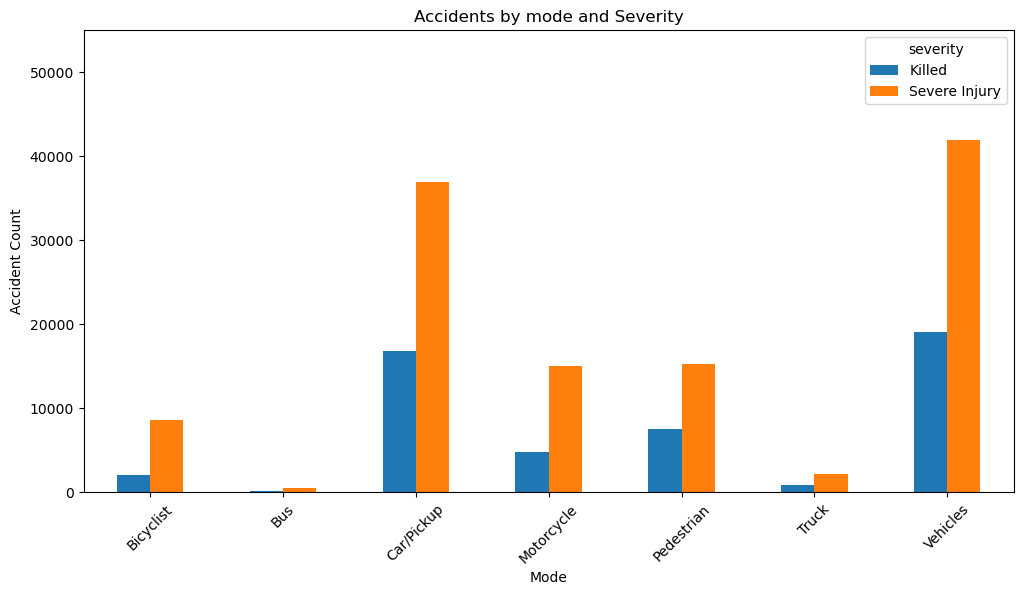

In [130]:
# Create a Bar chart- Accidents by Mode and severity
mode_severity = clean_df.groupby(['mode', 'severity']).size().reset_index(name='Accident Count')

pivot_data = mode_severity.pivot_table(index='mode', columns='severity', values='Accident Count').sort_index(axis=1)
pivot_data.plot.bar(figsize=(12, 6))
plt.xlabel('Mode')
plt.ylabel('Accident Count')
plt.ylim(0, 55000)
plt.title('Accidents by mode and Severity')
plt.xticks(rotation=45)
plt.show()


In [27]:
#need to do linear regression model of graphs. What does the data tell us? is there trend in injury over year? by region? By mode of transport?
#What about by miles traveled?(this will be found all the way back in beginnning under "df["avmtrate"] look at the excel dictionary I think we can still use this. If used be sure to remove rows are same as clean_df or new_df) 


# Assuming df is your DataFrame
correlation_matrix = clean_df[["geotypevalue","county_fips", "region_code", "injuries", "totalpop", "poprate"]].describe()

#I dont think this is the correlation we are looking for in regard to final project presentation. I think we should make a dataframe that
#is summed up and more about accident per region, modes of transport, and miles traveled.

# Display the correlation matrix
print(correlation_matrix)
#clean_df.info()

       geotypevalue    county_fips   region_code       injuries      totalpop  \
count  1.716590e+05  169627.000000  42056.000000  171659.000000  2.935600e+04   
mean   4.620454e+09    6056.053559      8.897660       7.883956  5.606361e+05   
std    3.602945e+09      27.392990      4.922086     120.673975  2.794148e+06   
min    1.000000e+00    6001.000000      1.000000       1.000000  0.000000e+00   
25%    6.001403e+09    6037.000000      4.000000       1.000000  2.858400e+04   
50%    6.037541e+09    6059.000000     10.000000       1.000000  6.551400e+04   
75%    6.071006e+09    6073.000000     14.000000       3.000000  1.629480e+05   
max    1.000000e+11    6115.000000     14.000000   11411.000000  3.725396e+07   

            poprate  
count  29278.000000  
mean      20.302066  
std      154.221396  
min        0.010000  
25%        2.400000  
50%        5.630000  
75%       14.557500  
max     8737.860000  


In [131]:
#create a population/year/county/region only dataframe
county_region_pop_df = clean_df.loc[:, ["reportyear", "county_name", "region_name", "totalpop"]]

#drop duplicate and na values
county_region_pop_df.drop_duplicates(inplace=True)
county_region_pop_df.dropna(inplace=True)
county_region_pop_df

# Create an empty list to store the summary data
region_pop_sum = []

# Assuming 'selected_columns_df' is your cleaned DataFrame with columns 'reportyear', 'region_name', and 'totalpop'
totalpop_sum_by_year_region = {}

# Calculate total population sums by year and region
for index, row in county_region_pop_df.iterrows():
    key = (row['reportyear'], row['region_name'])
    totalpop = row['totalpop']
    
    if key in totalpop_sum_by_year_region:
        totalpop_sum_by_year_region[key] += totalpop
    else:
        totalpop_sum_by_year_region[key] = totalpop

# Populate the summary data list with total population sums
for key, value in totalpop_sum_by_year_region.items():
    region_pop_sum.append({'reportyear': key[0], 'region_name': key[1], 'totalpop': value})

# Create a DataFrame from the summary data
region_pop_sum_df = pd.DataFrame(region_pop_sum)

# Display the summary DataFrame
region_pop_sum_df


,reportyear,region_name,totalpop
0,2002,Southern California,31979238.0
1,2002,Sacramento Area,3172237.0
2,2002,Northeast Sierra,269444.0
3,2002,Monterey Bay,1148629.0
4,2002,San Diego,5357079.0
...,...,...,...
121,2006,Butte,344142.0
122,2007,Butte,348522.0
123,2008,Butte,351566.0
124,2009,Butte,353546.0


In [132]:
#separate the region_pop_sum_df by years
region_pop_2002 = region_pop_sum_df[region_pop_sum_df['reportyear'] == "2002"][['region_name', 'totalpop']].reset_index(drop=True)
region_pop_2003 = region_pop_sum_df[region_pop_sum_df['reportyear'] == "2003"][['region_name', 'totalpop']].reset_index(drop=True)
region_pop_2004 = region_pop_sum_df[region_pop_sum_df['reportyear'] == "2004"][['region_name', 'totalpop']].reset_index(drop=True)
region_pop_2005 = region_pop_sum_df[region_pop_sum_df['reportyear'] == "2005"][['region_name', 'totalpop']].reset_index(drop=True)
region_pop_2006 = region_pop_sum_df[region_pop_sum_df['reportyear'] == "2006"][['region_name', 'totalpop']].reset_index(drop=True)
region_pop_2007 = region_pop_sum_df[region_pop_sum_df['reportyear'] == "2007"][['region_name', 'totalpop']].reset_index(drop=True)
region_pop_2008 = region_pop_sum_df[region_pop_sum_df['reportyear'] == "2008"][['region_name', 'totalpop']].reset_index(drop=True)
region_pop_2009 = region_pop_sum_df[region_pop_sum_df['reportyear'] == "2009"][['region_name', 'totalpop']].reset_index(drop=True)
region_pop_2010 = region_pop_sum_df[region_pop_sum_df['reportyear'] == "2010"][['region_name', 'totalpop']].reset_index(drop=True)

In [133]:
#separate dataframe for the total state population by year
# Group by "Report Year" and sum the "Total Population"
yearly_population_sum = region_pop_sum_df.groupby("reportyear")["totalpop"].sum().reset_index()

# Create a new DataFrame with the desired columns
total_pop_df = pd.DataFrame(yearly_population_sum, columns=["reportyear", "totalpop"])

# Display the new DataFrame
total_pop_df

,reportyear,totalpop
0,2002,62438764.0
1,2003,63306755.0
2,2004,63993141.0
3,2005,64482747.0
4,2006,65072668.0
5,2007,65556831.0
6,2008,66117468.0
7,2009,66648367.0
8,2010,66841953.0


In [137]:
#accidents per capita
accidents_per_capita = pd.merge(total_pop_df, yearly_accidents, on="reportyear", how="inner")
accidents_per_capita['accidents_per_capita'] = accidents_per_capita['count'] / accidents_per_capita['totalpop']
accidents_per_capita

# # #injuries per capita
injuries_per_capita = pd.merge(total_pop_df, yearly_injuries, on="reportyear", how="inner")
injuries_per_capita['injuries_per_capita'] = injuries_per_capita['injuries'] / injuries_per_capita['totalpop']
injuries_per_capita

# #injuries by mode per capita
injurymode_per_capita = pd.merge(total_pop_df, mode_by_year, on="reportyear", how="inner")


total_pop_df["bicyclist/pop"] = injurymode_per_capita["Bicyclist"]/injurymode_per_capita["totalpop"]
total_pop_df["bicyclist/accident"] = injurymode_per_capita["Bicyclist"]/accidents_per_capita["count"]
total_pop_df["bicyclist/injury"] = injurymode_per_capita["Bicyclist"]/injuries_per_capita["injuries"]

total_pop_df["bus/pop"] = injurymode_per_capita["Bus"]/injurymode_per_capita["totalpop"]
total_pop_df["bus/accident"] = injurymode_per_capita["Bus"]/accidents_per_capita["count"]
total_pop_df["bus/injury"] = injurymode_per_capita["Bus"]/injuries_per_capita["injuries"]

total_pop_df["carpickup/pop"] = injurymode_per_capita["Car/Pickup"]/injurymode_per_capita["totalpop"]
total_pop_df["carpickup/accident"] = injurymode_per_capita["Car/Pickup"]/accidents_per_capita["count"]
total_pop_df["carpickup/injury"] = injurymode_per_capita["Car/Pickup"]/injuries_per_capita["injuries"]

total_pop_df["motorcycle/pop"] = injurymode_per_capita["Motorcycle"]/injurymode_per_capita["totalpop"]
total_pop_df["motorcycle/accident"] = injurymode_per_capita["Motorcycle"]/accidents_per_capita["count"]
total_pop_df["motorcycle/injury"] = injurymode_per_capita["Motorcycle"]/injuries_per_capita["injuries"]

total_pop_df["ped/pop"] = injurymode_per_capita["Pedestrian"]/injurymode_per_capita["totalpop"]
total_pop_df["ped/accident"] = injurymode_per_capita["Pedestrian"]/accidents_per_capita["count"]
total_pop_df["ped/injury"] = injurymode_per_capita["Pedestrian"]/injuries_per_capita["injuries"]

total_pop_df["truck/pop"] = injurymode_per_capita["Truck"]/injurymode_per_capita["totalpop"]
total_pop_df["truck/accident"] = injurymode_per_capita["Truck"]/accidents_per_capita["count"]
total_pop_df["truck/injury"] = injurymode_per_capita["Truck"]/injuries_per_capita["injuries"]

total_pop_df["vehicles/pop"] = injurymode_per_capita["Vehicles"]/injurymode_per_capita["totalpop"]
total_pop_df["vehicles/accident"] = injurymode_per_capita["Vehicles"]/accidents_per_capita["count"]
total_pop_df["vehicles/injury"] = injurymode_per_capita["Vehicles"]/injuries_per_capita["injuries"]

total_pop_df


,reportyear,totalpop,bicyclist/pop,bicyclist/accident,bicyclist/injury,bus/pop,bus/accident,bus/injury,carpickup/pop,carpickup/accident,...,motorcycle/injury,ped/pop,ped/accident,ped/injury,truck/pop,truck/accident,truck/injury,vehicles/pop,vehicles/accident,vehicles/injury
0,2002,62438764.0,0.000061,0.192863,0.023072,0.000002,0.007846,0.000939,0.001028,3.250569,...,0.056954,0.000184,0.580714,0.069472,0.000018,0.058213,0.006964,0.001200,3.792711,0.453728
1,2003,63306755.0,0.000070,0.225973,0.027716,0.000004,0.012419,0.001523,0.000951,3.051754,...,0.062855,0.000210,0.673054,0.082551,0.000016,0.050436,0.006186,0.001130,3.627078,0.444867
2,2004,63993141.0,0.000083,0.265771,0.032436,0.000002,0.007516,0.000917,0.000942,3.021997,...,0.062927,0.000226,0.726061,0.088611,0.000017,0.055870,0.006819,0.001123,3.600992,0.439477
3,2005,64482747.0,0.000082,0.264382,0.032652,0.000003,0.010551,0.001303,0.000909,2.944782,...,0.065404,0.000233,0.755163,0.093266,0.000017,0.053761,0.006640,0.001092,3.538663,0.437041
4,2006,65072668.0,0.000088,0.284887,0.035810,0.000003,0.010984,0.001381,0.000873,2.835638,...,0.072675,0.000224,0.727645,0.091465,0.000014,0.046682,0.005868,0.001068,3.471466,0.436362
5,2007,65556831.0,0.000079,0.262152,0.032837,0.000003,0.009124,0.001143,0.000833,2.766993,...,0.081395,0.000230,0.763952,0.095693,0.000016,0.052714,0.006603,0.001047,3.478636,0.435735
6,2008,66117468.0,0.000089,0.316232,0.041854,0.000006,0.020209,0.002675,0.000687,2.448265,...,0.095542,0.000212,0.754042,0.099800,0.000015,0.052274,0.006919,0.000910,3.242617,0.429173
7,2009,66648367.0,0.000090,0.343835,0.047031,0.000005,0.019870,0.002718,0.000614,2.355872,...,0.090911,0.000206,0.790647,0.108147,0.000012,0.047803,0.006539,0.000805,3.088176,0.422411
8,2010,66841953.0,0.000088,0.354829,0.049732,0.000002,0.009315,0.001306,0.000564,2.265761,...,0.093416,0.000201,0.808462,0.113312,0.000011,0.044173,0.006191,0.000743,2.985756,0.418478


In [138]:
total_pop_df.columns

Index(['reportyear', 'totalpop', 'bicyclist/pop', 'bicyclist/accident',
       'bicyclist/injury', 'bus/pop', 'bus/accident', 'bus/injury',
       'carpickup/pop', 'carpickup/accident', 'carpickup/injury',
       'motorcycle/pop', 'motorcycle/accident', 'motorcycle/injury', 'ped/pop',
       'ped/accident', 'ped/injury', 'truck/pop', 'truck/accident',
       'truck/injury', 'vehicles/pop', 'vehicles/accident', 'vehicles/injury'],
      dtype='object')

In [141]:
mode_correlation_matrix = total_pop_df[['bicyclist/pop', 'bicyclist/accident',
       'bicyclist/injury', 'bus/pop', 'bus/accident', 'bus/injury',
       'carpickup/pop', 'carpickup/accident', 'carpickup/injury',
       'motorcycle/pop', 'motorcycle/accident', 'motorcycle/injury', 'ped/pop',
       'ped/accident', 'ped/injury', 'truck/pop', 'truck/accident',
       'truck/injury', 'vehicles/pop', 'vehicles/accident', 'vehicles/injury']].describe()

mode_correlation_matrix


,bicyclist/pop,bicyclist/accident,bicyclist/injury,bus/pop,bus/accident,bus/injury,carpickup/pop,carpickup/accident,carpickup/injury,motorcycle/pop,...,motorcycle/injury,ped/pop,ped/accident,ped/injury,truck/pop,truck/accident,truck/injury,vehicles/pop,vehicles/accident,vehicles/injury
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.000081,0.278992,0.035905,0.000003,0.011982,0.001545,0.000822,2.771292,0.351396,0.000172,...,0.075787,0.000214,0.731082,0.093591,0.000015,0.051325,0.006525,0.001013,3.425122,0.435252
std,0.000010,0.052771,0.008762,0.000001,0.004815,0.000682,0.000163,0.342410,0.025434,0.000017,...,0.014858,0.000016,0.068682,0.013119,0.000002,0.004511,0.000373,0.000157,0.265665,0.010837
min,0.000061,0.192863,0.023072,0.000002,0.007516,0.000917,0.000564,2.265761,0.317565,0.000151,...,0.056954,0.000184,0.580714,0.069472,0.000011,0.044173,0.005868,0.000743,2.985756,0.418478
25%,0.000079,0.262152,0.032436,0.000002,0.009124,0.001143,0.000687,2.448265,0.324037,0.000161,...,0.062927,0.000206,0.726061,0.088611,0.000014,0.047803,0.006191,0.000910,3.242617,0.429173
50%,0.000083,0.265771,0.032837,0.000003,0.010551,0.001306,0.000873,2.835638,0.356439,0.000166,...,0.072675,0.000212,0.754042,0.093266,0.000016,0.052274,0.006603,0.001068,3.478636,0.436362
75%,0.000088,0.316232,0.041854,0.000004,0.012419,0.001523,0.000942,3.021997,0.368814,0.000178,...,0.090911,0.000226,0.763952,0.099800,0.000017,0.053761,0.006819,0.001123,3.600992,0.439477
max,0.000090,0.354829,0.049732,0.000006,0.020209,0.002718,0.001028,3.250569,0.388871,0.000203,...,0.095542,0.000233,0.808462,0.113312,0.000018,0.058213,0.006964,0.001200,3.792711,0.453728


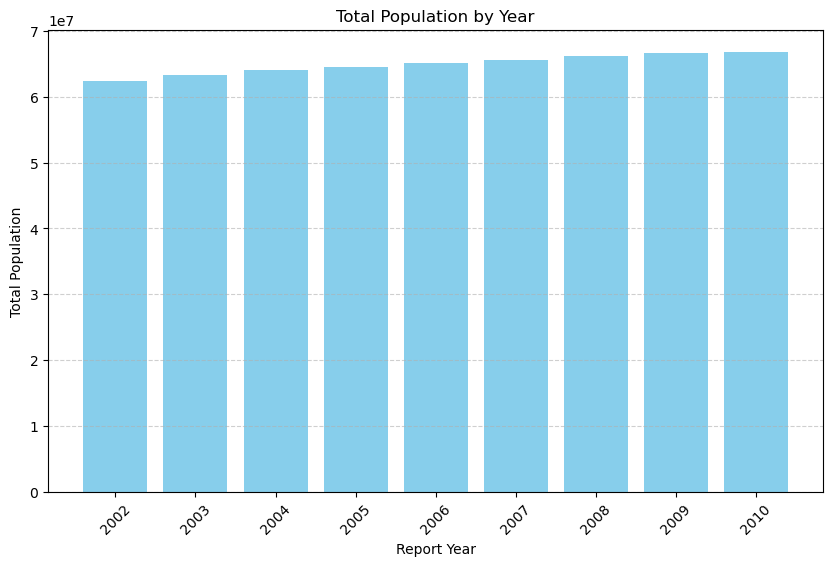

In [78]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_pop_df["reportyear"], total_pop_df["totalpop"], color='skyblue')
plt.xlabel('Report Year')
plt.ylabel('Total Population')
plt.title('Total Population by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()